In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from figures.figureCommon import subplotLabel, getSetup
from tensorly.metrics.regression import variance as tl_var
from dataHelpers import importLINCSprotein, ohsu_data
from Data_Mod import LINCSCleanUp, dataCleanUp, form_parafac2_tensor, ohsu_var
from tensor import OHSU_parafac2_decomp, R2Xparafac2

In [3]:
p2slices, treatmentsTime, proteins, chromosomes, IFproteins, histones, geneExpression, RNAGenes, RPPAProteins = form_parafac2_tensor()
p2slicesB = ohsu_var(p2slices)

In [ ]:
r2x = []
components = 10
for i in range(1, components + 1):
    parafac2tensor, error = OHSU_parafac2_decomp(p2slicesB, i)
    r2x.append(R2Xparafac2(p2slicesB, parafac2tensor))

In [3]:
df = pd.DataFrame(r2x)

comps = []
for i in range(1, components + 1):
    comps.append(i)
df['Component'] = comps

df.columns = ['Proteins', 'Chromosomes', 'IFproteins', 'Histones', 'Gene Expression', 'RNA Genes', 'RPPA Proteins', 'Component']
test = pd.melt(df, id_vars=['Component'])

(0.0, 1.0)

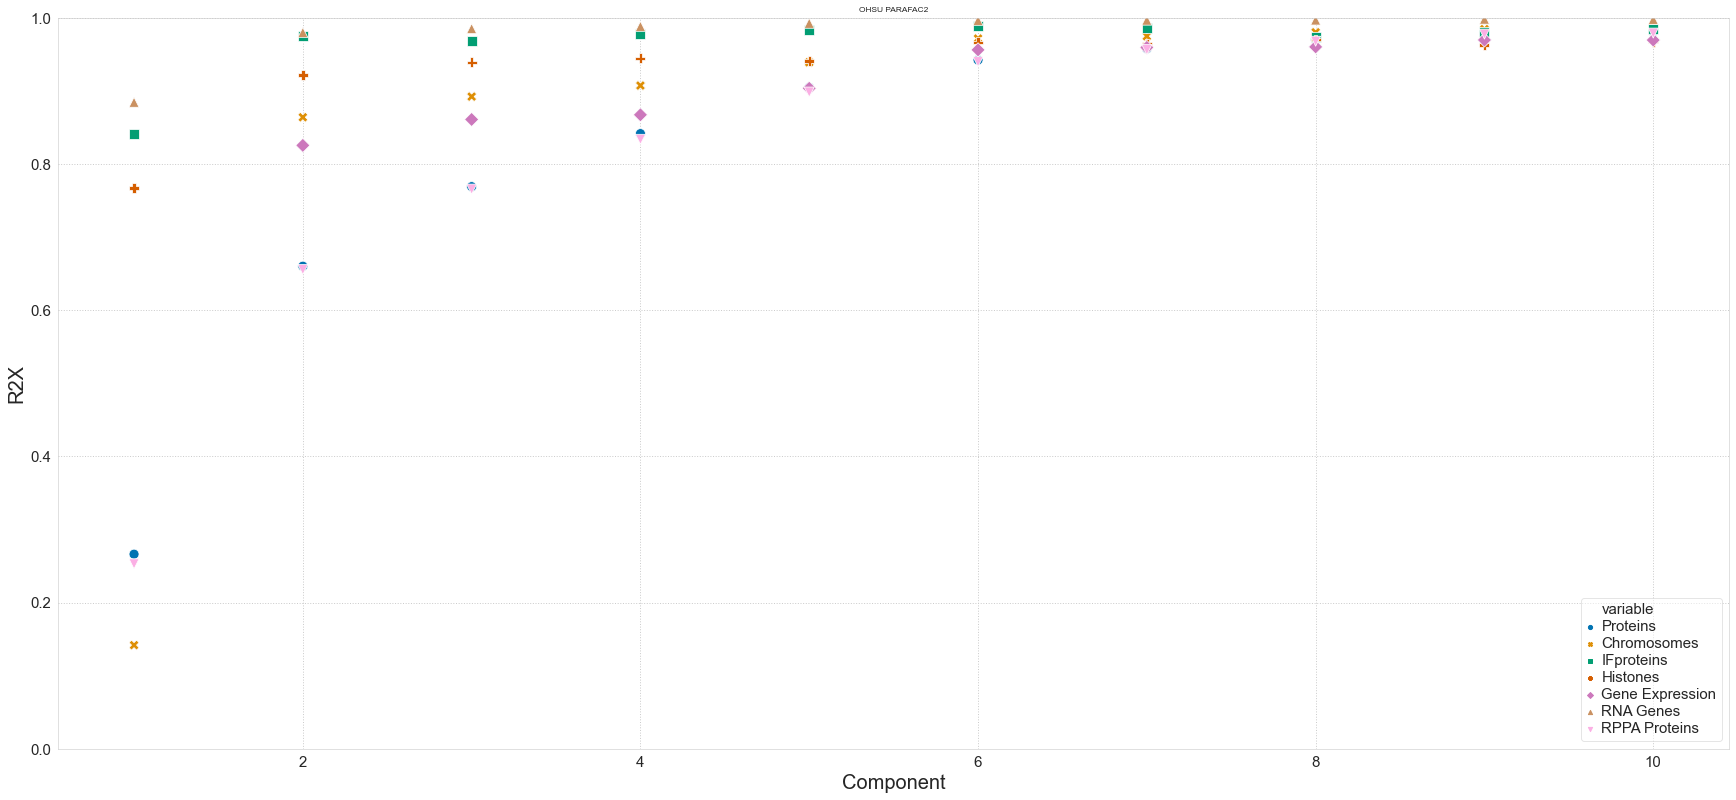

In [30]:
ax, f = getSetup((24, 11), (1, 1))
b = sns.scatterplot(data=test, x='Component', y='value', hue='variable', style='variable', ax=ax[0], s=100)
b.set_xlabel("Component", fontsize=20)
b.set_ylabel("R2X", fontsize=20)
b.set_title("OHSU PARAFAC2")
b.tick_params(labelsize=15)
plt.legend(prop={'size': 15})
ax[0].set_ylim(0, 1)

In [4]:
parafac2tensor, error = OHSU_parafac2_decomp(p2slicesB, 10)

In [5]:
C = parafac2tensor[1][2]

In [16]:
D = parafac2tensor[2][1]
print(D.shape)

(134435, 10)


<Figure size 432x288 with 0 Axes>

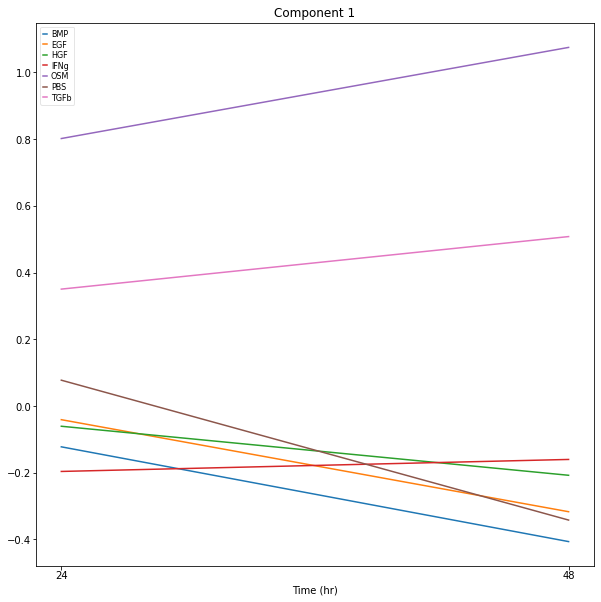

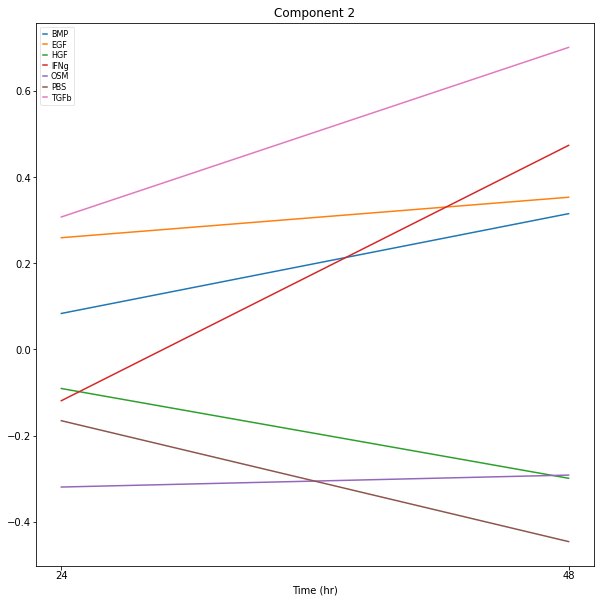

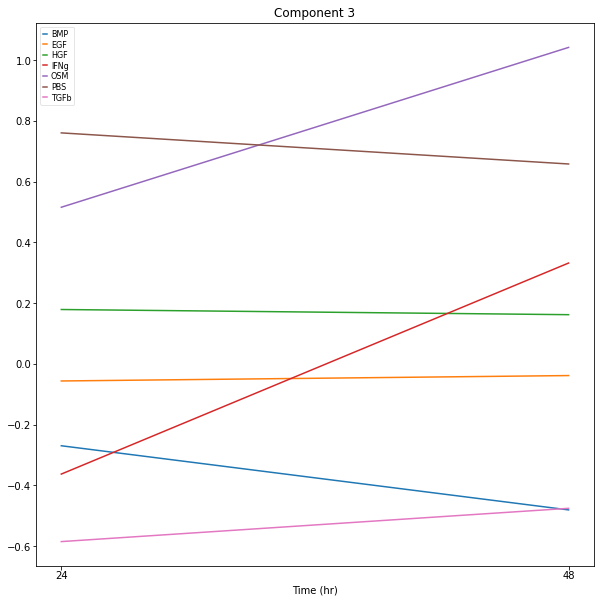

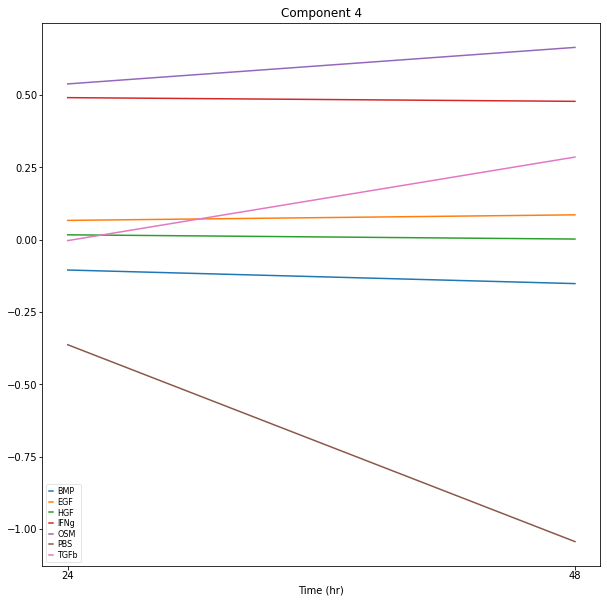

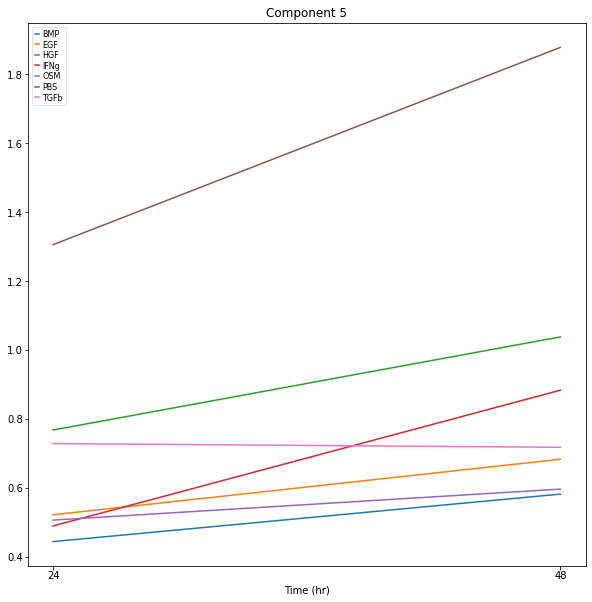

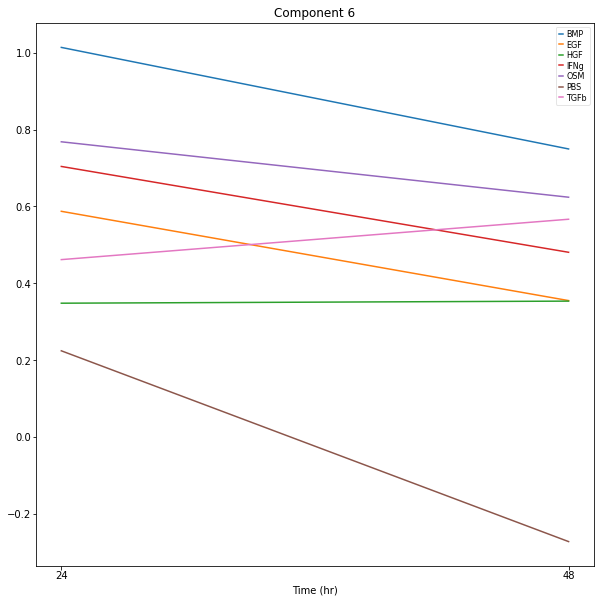

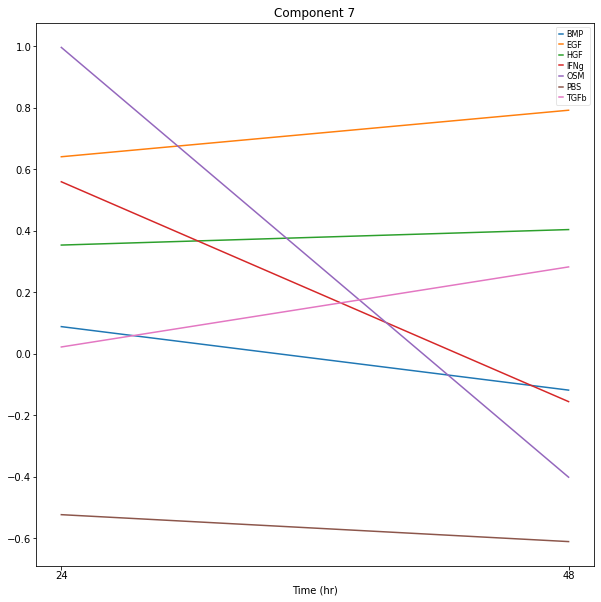

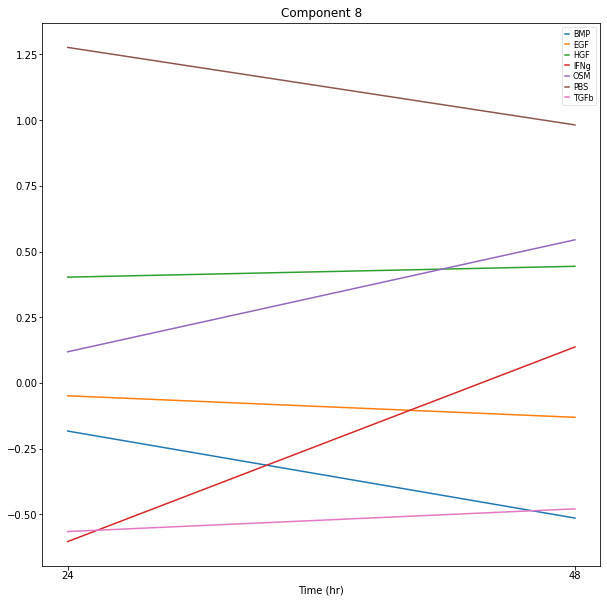

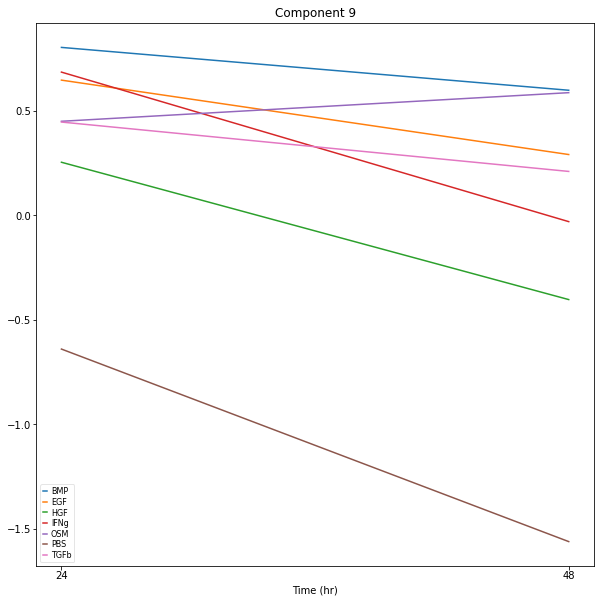

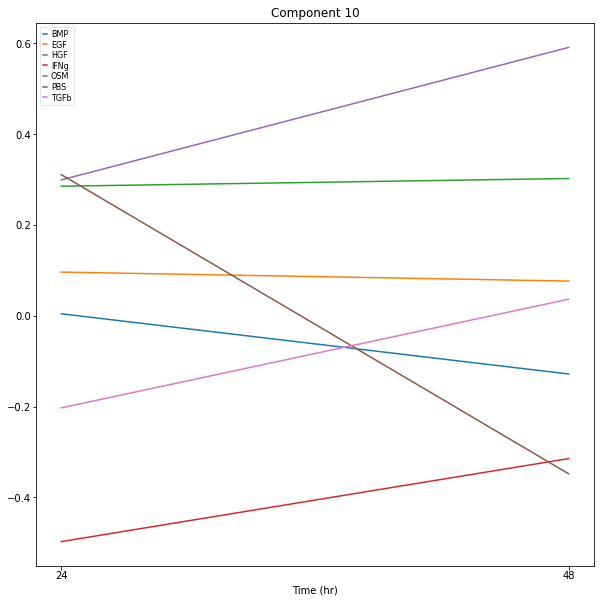

In [19]:
components = 10
treatments = ['BMP2_24', 'BMP2_48', 'EGF_24', 'EGF_48', 'HGF_24', 'HGF_48', 'IFNg_24', 'IFNg_48', 'OSM_24', 'OSM_48', 'PBS_24', 'PBS_48', 'TGFb_24', 'TGFb_48']
df = pd.DataFrame(C, index = treatments)
trmt = df.to_numpy()
for x in range(10):
    BMP, EGF, HGF, IFNg, OSM, PBS, TGFb = [], [], [], [], [], [], []
    plt.figure(x)
    plt.figure(figsize=(10,10))
    plt.xticks([0,1], ['24','48'])
    plt.xlabel('Time (hr)')
    plt.title('Component ' + str(x+1))
    for y in range(7):
        if y == 0:
            BMP.append(trmt[(y*2), x])
            BMP.append(trmt[(y*2)+1,x])
        elif y == 1:
            EGF.append(trmt[(y*2), x])
            EGF.append(trmt[(y*2)+1,x])
        elif y == 2:
            HGF.append(trmt[(y*2), x])
            HGF.append(trmt[(y*2)+1, x])
        elif y == 3:
            IFNg.append(trmt[(y*2), x])
            IFNg.append(trmt[(y*2)+1, x])
        elif y == 4:
            OSM.append(trmt[(y*2), x])
            OSM.append(trmt[(y*2)+1, x])
        elif y == 5:
            PBS.append(trmt[(y*2), x])
            PBS.append(trmt[(y*2)+1, x])
        elif y == 6:
            TGFb.append(trmt[(y*2), x])
            TGFb.append(trmt[(y*2)+1, x])
    plt.plot(BMP)
    plt.plot(EGF)
    plt.plot(HGF)
    plt.plot(IFNg)
    plt.plot(OSM)
    plt.plot(PBS)
    plt.plot(TGFb)
    plt.legend(['BMP', 'EGF', 'HGF', 'IFNg', 'OSM', 'PBS', 'TGFb'])
        

In [11]:
C = parafac2tensor[1][2]
components = 10
treatments = ['BMP2_24', 'BMP2_48', 'EGF_24', 'EGF_48', 'HGF_24', 'HGF_48', 'IFNg_24', 'IFNg_48', 'OSM_24', 'OSM_48', 'PBS_24', 'PBS_48', 'TGFb_24', 'TGFb_48']
df = pd.DataFrame(C, index = treatments, columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
for x in range(10):
    for y in range(7):
        if y == 0:
            BMP1 = df.loc['BMP2_24':'BMP2_48', str(x+1)]
        elif y == 1:
            EGF1 = df.loc['EGF_24':'EGF_48', str(x+1)]
        elif y == 2:
            HGF1 = df.loc['HGF_24':'HGF_48', str(x+1)]
        elif y == 3:
            IFNg1 = df.loc['IFNg_24':'IFNg_48', str(x+1)]
        elif y == 4:
            OSM1 = df.loc['OSM_24':'OSM_48', str(x+1)]
        elif y == 5:
            PBS1 = df.loc['PBS_24':'PBS_48', str(x+1)]
        elif y == 6:
            TGFb1 = df.loc['TGFb_24':'TGFb_48', str(x+1)]
    BMP1['Time'] = [24, 48]
    EGF1['Time'] = [24, 48]
    HGF1['Time'] = [24, 48]
    IFNg1['Time'] = [24, 48]
    OSM1['Time'] = [24, 48]
    PBS1['Time'] = [24, 48]
    TGFb1['Time'] = [24, 48]
    BMP1 = BMP1.set_index('Time')
    EGF1 = EGF1.set_index('Time')
    HGF1 = HGF1.set_index('Time')
    IFNg1 = IFNg1.set_index('Time')
    OSM1 = OSM1.set_index('Time')
    PBS1 = PBS1.set_index('Time')
    TGFb1 = TGFb1.set_index('Time')
    b = sns.lineplot(data=BMP1, ax=ax[x], dashes=None)
    b = sns.lineplot(data=EGF1, ax=ax[x], dashes=None)
    b = sns.lineplot(data=HGF1, ax=ax[x], dashes=None)
    b = sns.lineplot(data=IFNg1, ax=ax[x], dashes=None)
    b = sns.lineplot(data=OSM1, ax=ax[x], dashes=None)
    b = sns.lineplot(data=PBS1, ax=ax[x], dashes=None)
    b = sns.lineplot(data=TGFb1, ax=ax[x], dashes=None)
    b.set_title('Component ' + str(x + 1))
for i in range(components + 1, len(ax)):
    ax[i].axis('off'

AttributeError: 'Series' object has no attribute 'set_index'